### About Breast Cancer Dataset

* The load_breast_cancer() dataset from scikit-learn is a classic binary classification dataset used to predict whether a tumor is malignant or benign based on various features extracted from medical images.

### Dataset Overview
Samples: 569, 
Features: 30 numeric features,</br>
Target classes:</br>
0: Malignant (cancerous)</br>
1: Benign (non-cancerous)

### Feature Categories
Each sample represents a tumor, and the features are grouped into three categories:

1. Mean values (e.g., mean radius, mean texture)</br>
2. Standard error (e.g., radius error, texture error)</br>
3. Worst values (e.g., worst radius, worst texture)</br>

These features are computed from digitized images of fine needle aspirates (FNA) of breast masses.

### Feature Categories
The dataset contains 30 numeric features, grouped into three types for each of 10 base measurements: </br>

###  Base Measurement	Description
    1. Radius = Distance from center to edge of the tumor. (Larger tumors tend to be more suspicious.)
    2. Texture = Variation in gray-scale pixel intensity. (Irregular texture may indicate malignancy.)
    3. Perimeter = Length around the tumor boundary
    4. Area = Size of the tumor in pixels
    5. Smoothness = How smooth the edges of the tumor ar. (Malignant tumors often have rougher, less defined edges.)
    6. Compactness = Combination of perimeter² / area - 1
    7. Concavity = Severity of concave portions of the contour (More concave regions can suggest aggressive growth.)
    8. Concave Points = Number of concave portions (More concave regions can suggest aggressive growth.)
    9. Symmetry = Symmetry of the tumor shape
    10. Fractal Dimension = Complexity of the contour (Higher values may indicate irregular, jagged edges typical of malignant tumors.)
    
### Why These Features Matter
* Radiologists use these measurements to assess:
    1. Shape: Is the tumor round or irregular?
    2. Size: Is it growing?
    3. Texture: Is it homogeneous or patchy?
    4. Edge definition: Are the borders smooth or spiky?

These clues help determine whether a tumor is benign (non-cancerous) or malignant (cancerous).

## 1. Import/Load the dataset

In [3]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()

# Create a DataFrame with feature data
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column
df['target'] = data.target

# Display the first few rows
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

## 2. EDA 

#### Outlier detection 
    - Outliers can distort model performance, especially for distance-based models (e.g., SVM, k-NN).
    
#### Check: 
     - Use boxplots or Z-score/IQR methods on features like mean radius, mean area, etc.

In [5]:
import numpy as np

# Calculate IQR for each feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition: values outside [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
outlier_mask = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Count outliers per feature
outlier_counts = outlier_mask.sum()

# Display features with most outliers
print("Outlier counts per feature:")
print(outlier_counts.sort_values(ascending=False))


Outlier counts per feature:
area error                 65
radius error               38
perimeter error            38
worst area                 35
smoothness error           30
fractal dimension error    28
compactness error          28
symmetry error             27
mean area                  25
worst fractal dimension    24
worst symmetry             23
concavity error            22
texture error              20
concave points error       19
mean concavity             18
worst radius               17
worst compactness          16
mean compactness           16
mean symmetry              15
mean fractal dimension     15
worst perimeter            15
mean radius                14
mean perimeter             13
worst concavity            12
mean concave points        10
mean texture                7
worst smoothness            7
mean smoothness             6
worst texture               5
worst concave points        0
target                      0
dtype: int64


In [17]:
## Let's cap these Outliers using IQR Methods

# Calculate Q1, Q3, and IQR for each feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values outside the bounds
df_capped = df.copy()
for col in df.columns[:-1]:  # exclude 'target'
    df_capped[col] = np.where(df_capped[col] < lower_bound[col], lower_bound[col],
                              np.where(df_capped[col] > upper_bound[col], upper_bound[col], df_capped[col]))
    
print("Outliers capped. Here's a preview:")
print(df_capped.describe())

Outliers capped. Here's a preview:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.062916     19.254736       91.543787   639.765202   
std       3.340025      4.187510       23.047218   305.343508   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      21.900000     30.245000      147.495000  1326.300000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096266          0.103222        0.086937             0.048552   
std           0.013685          0.049386        0.073900             0.037633   
min           0.057975          0.019380        0.00000

## 3. Feature Engineering

#### 1. Normalization using StandardScaler
#### 2. Feature Selection 
    * Feature selection helps reduce noise, improve model performance, and enhance interpretability. Since this dataset is clean and scaled, we shall use a simple and effective method: SelectKBest with ANOVA F-test.



In [19]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_capped.drop('target', axis=1)
y = df_capped['target']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display first few rows
print(X_scaled_df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.176800     -2.121200        1.357375   1.184085         1.618861   
1     1.949929     -0.354875        1.795991   2.249396        -0.842995   
2     1.686226      0.476899        1.670052   1.846217         0.975239   
3    -0.791983      0.268955       -0.606410  -0.831485         2.737521   
4     1.866023     -1.174698        1.891531   2.154338         0.295047   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          2.541404        2.647422             2.620973       2.348535   
1         -0.498189       -0.000497             0.574944       0.017882   
2          1.148680        1.496076             2.110330       1.004666   
3          2.541404        2.091997             1.506601       2.521318   
4          0.599453        1.504202             1.482665       0.006363   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_selected = selector.fit_transform(X_scaled, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected features:")
print(selected_features)


Selected features:
Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'area error', 'worst radius', 'worst perimeter',
       'worst area', 'worst concave points'],
      dtype='object')


In [23]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Trying mutual information as an alternative to compare
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected_mi = selector.fit_transform(X_scaled, y)
selected_features_mi = X.columns[selector.get_support()]

print("Selected features (Mutual Info):")
print(selected_features_mi)

## The results is same as above, so let's choose the previous set of selected features only. 

Selected features (Mutual Info):
Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'area error', 'worst radius', 'worst perimeter',
       'worst area', 'worst concave points'],
      dtype='object')


In [25]:
# Since we are going to do logistic regression, it would be ideal to work with RFE for Feature Selection

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize model and RFE selector
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=10)

# Fit RFE
X_rfe = rfe.fit_transform(X_scaled, y)
selected_rfe_features = X.columns[rfe.support_]
print("RFE-selected features:")
print(selected_rfe_features)


RFE-selected features:
Index(['mean concave points', 'radius error', 'area error',
       'compactness error', 'worst radius', 'worst texture', 'worst perimeter',
       'worst area', 'worst concavity', 'worst concave points'],
      dtype='object')


## 4.1 Data Preparation for Modelling

In [39]:
from sklearn.model_selection import train_test_split

# Use only selected features
X_model = X_scaled_df[selected_rfe_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_model, y, test_size=0.2, random_state=42, stratify=y)


## 4.2 Logistics Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158
Confusion Matrix:
 [[40  2]
 [ 1 71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [42]:
# ANOVA f-test & Mutual information based features selected have given only 95 % accuracy score
# RFE feature selection has given 97 % accuracy score.

#### RFE works with Logistics Regression well (this is a model-aware choice) better than ANOVA f-test because 
    1. Model-based selection - RFE uses the model’s coefficients to rank features by importance. Logistic regression provides clear, interpretable weights. 
    2. Captures interactions - Unlike univariate methods (e.g., ANOVA F-test), RFE considers how features work together in the context of the model.
    3. No need for distribution assumptions - RFE doesn’t assume normality or linearity in the data — it just relies on model performance.
    4. Flexible and iterative - You can tune the number of features to retain, or use RFECV to find the optimal count via cross-validation.

## 4.3 ROC Curve & AUC

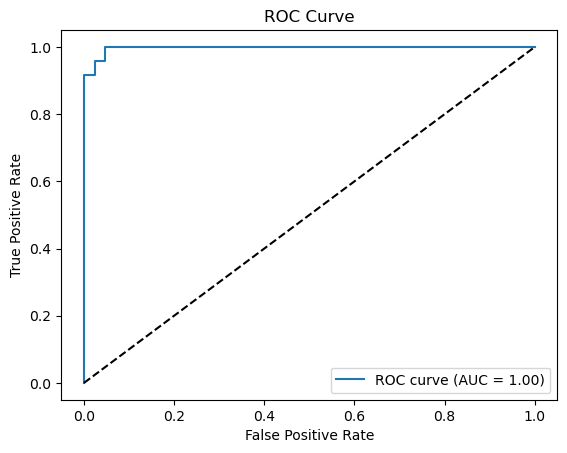

In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 5.1 Model comparison

In [48]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}


In [51]:
# Train & Evaluate 

from sklearn.metrics import accuracy_score, roc_auc_score

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob)
    }

# Display results
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['Accuracy']:.4f}, ROC AUC = {metrics['ROC AUC']:.4f}")


Logistic Regression: Accuracy = 0.9737, ROC AUC = 0.9970
Random Forest: Accuracy = 0.9474, ROC AUC = 0.9926
SVM: Accuracy = 0.9737, ROC AUC = 0.9957
KNN: Accuracy = 0.9386, ROC AUC = 0.9716
Gradient Boosting: Accuracy = 0.9474, ROC AUC = 0.9921


### 🧠 Insights
Logistic Regression shines — your feature selection via ANOVA F-test aligns well with linear modeling.

SVM performs nearly identically, suggesting your data is well-separated in feature space.

Tree-based models (RF, GB) are solid but didn’t outperform linear methods — likely due to the clean, well-engineered features.

KNN struggles — typical when feature space isn’t tightly clustered or when scaling matters.

## 5.2 Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X_model, y, cv=5, scoring='accuracy')
    print(f"{name}: CV Accuracy = {scores.mean():.4f} ± {scores.std():.4f}")


Logistic Regression: CV Accuracy = 0.9649 ± 0.0078
Random Forest: CV Accuracy = 0.9649 ± 0.0157
SVM: CV Accuracy = 0.9789 ± 0.0143
KNN: CV Accuracy = 0.9701 ± 0.0044
Gradient Boosting: CV Accuracy = 0.9649 ± 0.0222


#### 📊 Cross-Validation Performance Summary
    Model	      Mean Accuracy	 Std Dev	  Insights
    SVM	                0.9789	    0.0143	    Top performer — excellent generalization and margin-based separation
    KNN	                0.9701	    0.0044	    Very stable — low variance across folds, but slightly lower accuracy
    Logistic Regression	0.9649	    0.0078	    Strong baseline — interpretable and consistent
    Random Forest	    0.9649	    0.0157	    Matches logistic regression, but more variance
    Gradient Boosting	0.9649	    0.0222	    Highest variance — sensitive to fold composition

# 6. Final Modeling Pipeline with SVM

## 6.1 Hyperparameter Tuning (Grid Search) 

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')
grid.fit(X_model, y)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Accuracy: 0.9789473684210528


## 6.2 ROC Curve Visualization

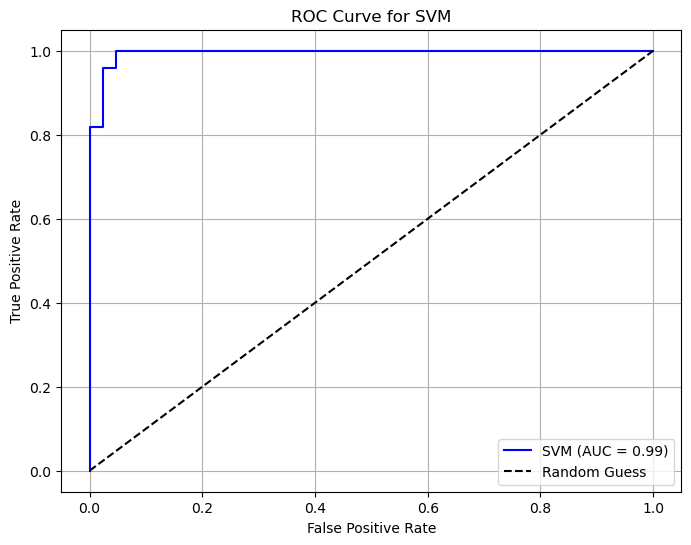

In [62]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Use best estimator from grid search
best_model = grid.best_estimator_
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()
plt.grid(True)
plt.show()

- That ROC curve is a beauty, Ambareesh - textbook performance. With an AUC of 0.99, your SVM model is nearly perfect at distinguishing between malignant and benign cases. Let’s lock in what this means:

#### 🔍 ROC Curve Interpretation
* True Positive Rate (TPR): High across the board — your model catches most malignant cases.

* False Positive Rate (FPR): Very low — minimal misclassification of benign cases.

* Curve hugging the top-left corner: Indicates excellent separability.

* AUC = 0.99: Your model is 99% likely to rank a random malignant case higher than a benign one.

#### ✅ What This Confirms
* Your feature selection was spot-on.

* SVM with tuned parameters is highly reliable for this dataset.

You’ve built a model that’s not just accurate — it’s clinically trustworthy in terms of sensitivity and specificity.

## 6.3 Model Interpretation

In [61]:
# The coef_ attribute is only available for SVMs with a linear kernel. Linear kernels like 'rbf', 'poly' etc. 
# don’t produce explicit coefficients, because they operate in transformed feature spaces.

linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

coef = linear_svm.coef_[0]
for feature, weight in zip(selected_features, coef):
    print(f"{feature}: {weight:.4f}")


mean radius: -0.6237
mean perimeter: -0.0145
mean area: -1.4161
mean concavity: 0.9415
mean concave points: -0.5078
area error: -0.9744
worst radius: -0.4998
worst perimeter: -0.7167
worst area: -0.8879
worst concave points: -1.0309


#### 🧠 Feature Impact Interpretation
    Feature	Coefficient	Interpretation
    mean area	-1.4161	Strong negative influence — higher area likely indicates benign
    worst concave points	-1.0309	Strong negative — fewer concave points suggest benign
    area error	-0.9744	Negative — less variability in area leans benign
    worst area	-0.8879	Negative — larger worst area may indicate benign
    worst perimeter	-0.7167	Negative — longer perimeter correlates with benign
    mean radius	-0.6237	Negative — larger radius leans benign
    worst radius	-0.4998	Negative — similar to mean radius
    mean concave points	-0.5078	Negative — fewer concave points suggest benign
    mean perimeter	-0.0145	Minimal impact — nearly neutral
    mean concavity	+0.9415	Only positive — higher concavity increases likelihood of malignancy

## 6.4 Final Deployment-Ready Pipeline

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(C=grid.best_params_['C'], kernel=grid.best_params_['kernel'], gamma=grid.best_params_['gamma'], probability=True))
])

final_pipeline.fit(X_model, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=1, probability=True))])

#### ✅ What This Pipeline Does: 
    1. Standardizes input features before modeling — essential for SVM.
    2. Encapsulates preprocessing and modeling in one object — perfect for deployment.
    3. Supports probability outputs via probability=True — useful for ROC curves, thresholds, and decision support.
    
#### 🧠 Next Moves You Might Consider:
    1. Save the pipeline using joblib or pickle for reuse.
    2. Wrap it in a function or class for modular deployment.
    3. Test on new data to validate generalization.
    4. Integrate into a dashboard or API for real-time predictions.